# EDA Example

## Packages - install if needed

In [1]:
#! pip install swifter
#! pip install wordcloud
#! pip install spacy
#! pip install wordcloud
#! pip install missingno

## Imports

In [1]:
import seaborn as sn
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import eda_utils as eda

# Load Data - from seaborn

In [3]:
#data = sn.load_dataset('mpg')
#print(data.shape)
#data.head(5)

# Load Data - from file

In [4]:
filename = "AB_NYC_2019.zip"
data = pd.read_csv(filename, compression="zip")
print(data.shape)
data.head(5)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Try to infer Dates automatically

In [5]:
data = eda.infer_date_col(data)

col: last_review was transformed to date


# EDA
- Missing data visualization
- Basic EDA
- EDA Correlations/Subgroup-populations - all to Column
- EDA on text columns

## Missing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

None

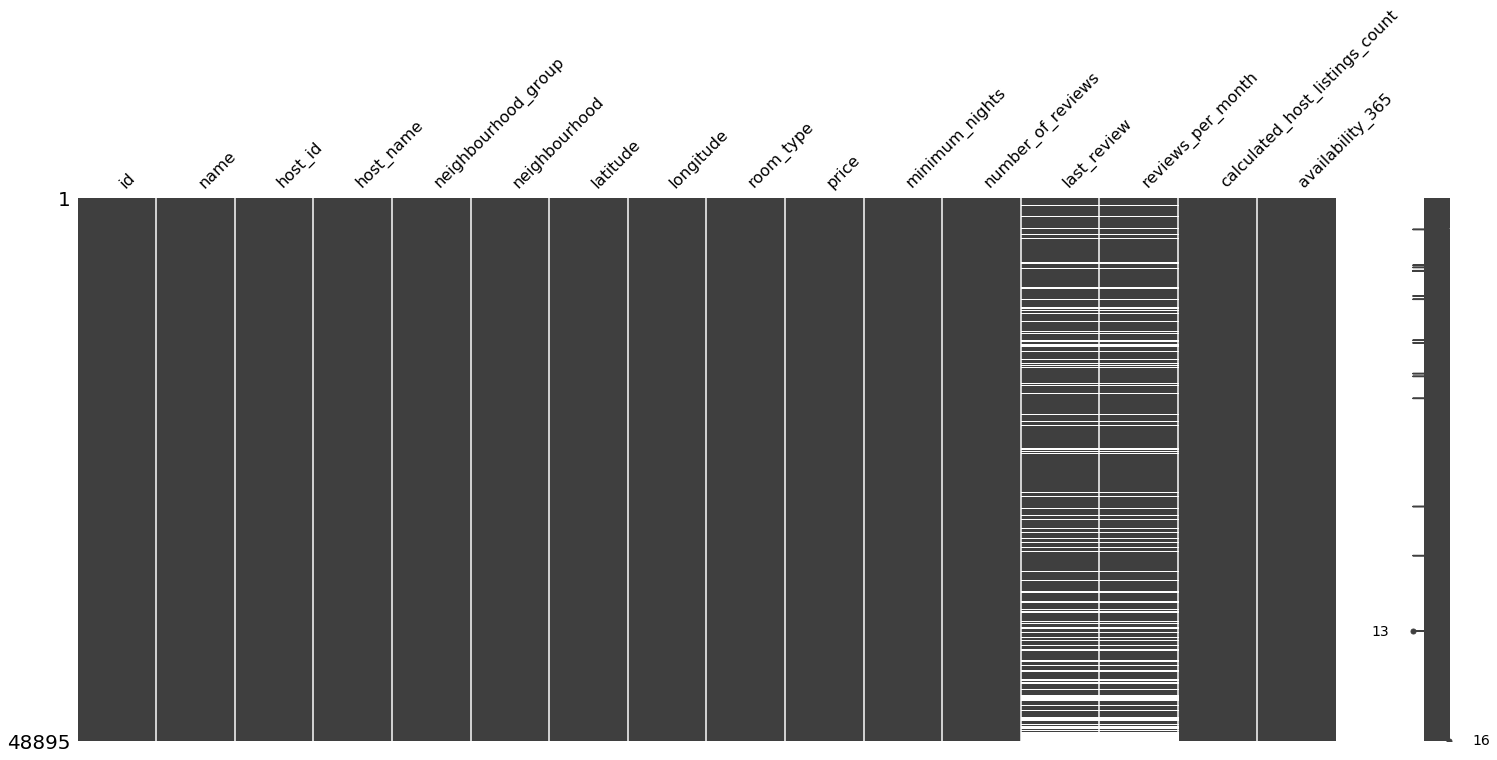

In [6]:
eda.missing_data(data)

## Basic EDA


column: id , dtype: int64
count: 48895
nunique: 48895
isnull sum: 0
zero count: 0
max: 36487245 min: 2539
top value counts:
       id  count
 11667455      1
  7851219      1
 33138268      1


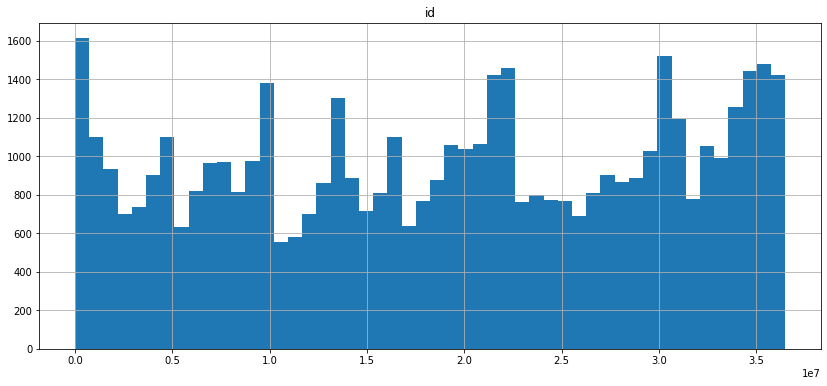


column: name , dtype: object
count: 48879
nunique: 47905
isnull sum: 16
zero count: 0
top value counts:
                         name  count
               Hillside Hotel     18
          Home away from home     17
 New york Multi-unit building     16
nunique: 47905
Too many (or just one) unique values for bar-plot

column: host_id , dtype: int64
count: 48895
nunique: 37457
isnull sum: 0
zero count: 0
max: 274321313 min: 2438
top value counts:
   host_id  count
 219517861    327
 107434423    232
  30283594    121


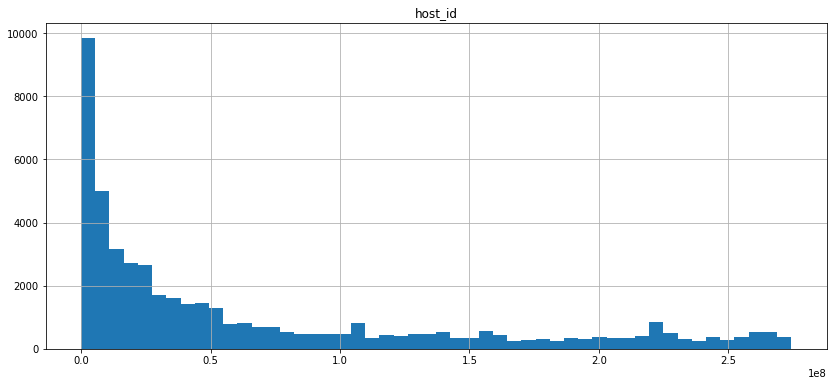


column: host_name , dtype: object
count: 48874
nunique: 11452
isnull sum: 21
zero count: 0
top value counts:
    host_name  count
      Michael    417
        David    403
 Sonder (NYC)    327
nunique: 11452
Too many (or just one) unique values for bar-plot

column: neighbourhood_group , dtype: object
count: 48895
nunique: 5
isnull sum: 0
zero count: 0
top value counts:
neighbourhood_group  count
          Manhattan  21661
           Brooklyn  20104
             Queens   5666
nunique: 5


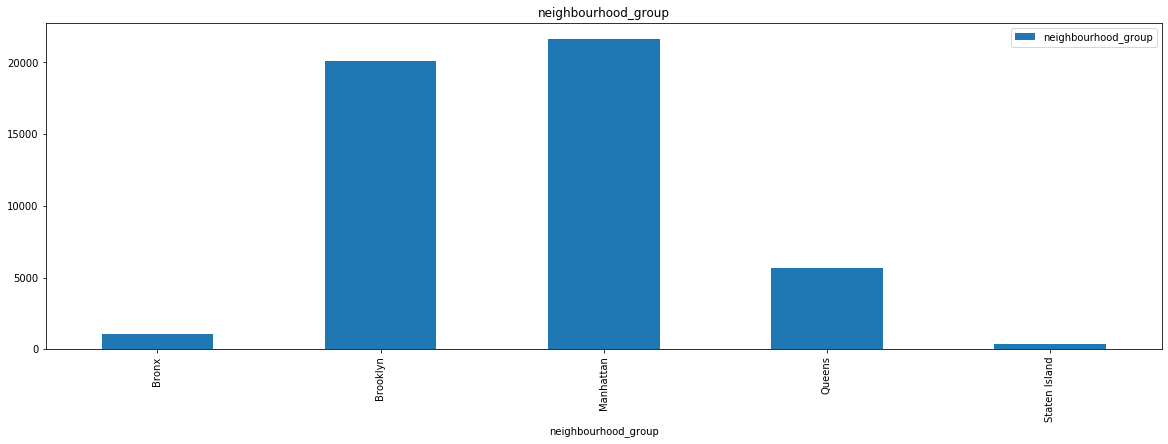


column: neighbourhood , dtype: object
count: 48895
nunique: 221
isnull sum: 0
zero count: 0
top value counts:
      neighbourhood  count
       Williamsburg   3920
 Bedford-Stuyvesant   3714
             Harlem   2658
nunique: 221
Too many (or just one) unique values for bar-plot

column: latitude , dtype: float64
count: 48895
nunique: 19048
isnull sum: 0
zero count: 0
max: 40.913059999999994 min: 40.499790000000004
top value counts:
 latitude  count
 40.71813     18
 40.68634     13
 40.69414     13


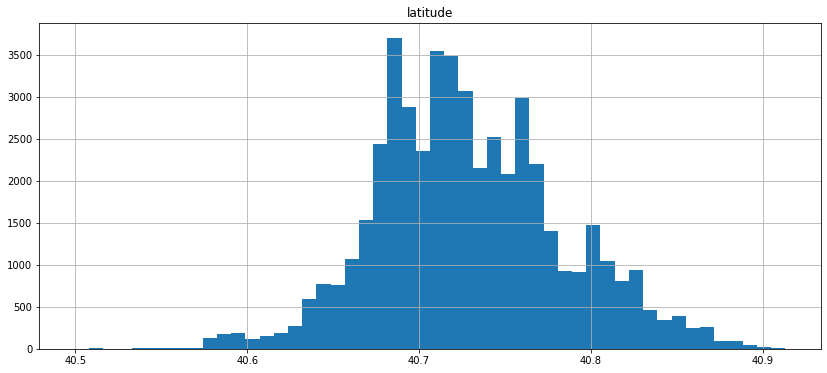


column: longitude , dtype: float64
count: 48895
nunique: 14718
isnull sum: 0
zero count: 0
max: -73.71299 min: -74.24441999999999
top value counts:
 longitude  count
 -73.95677     18
 -73.95427     18
 -73.95405     17


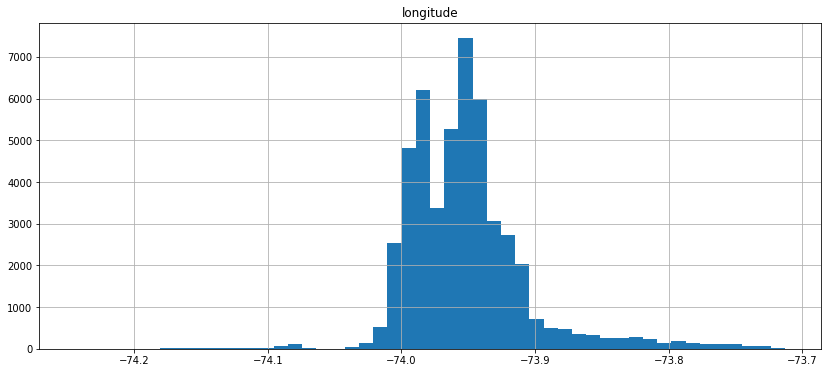


column: room_type , dtype: object
count: 48895
nunique: 3
isnull sum: 0
zero count: 0
top value counts:
       room_type  count
 Entire home/apt  25409
    Private room  22326
     Shared room   1160
nunique: 3


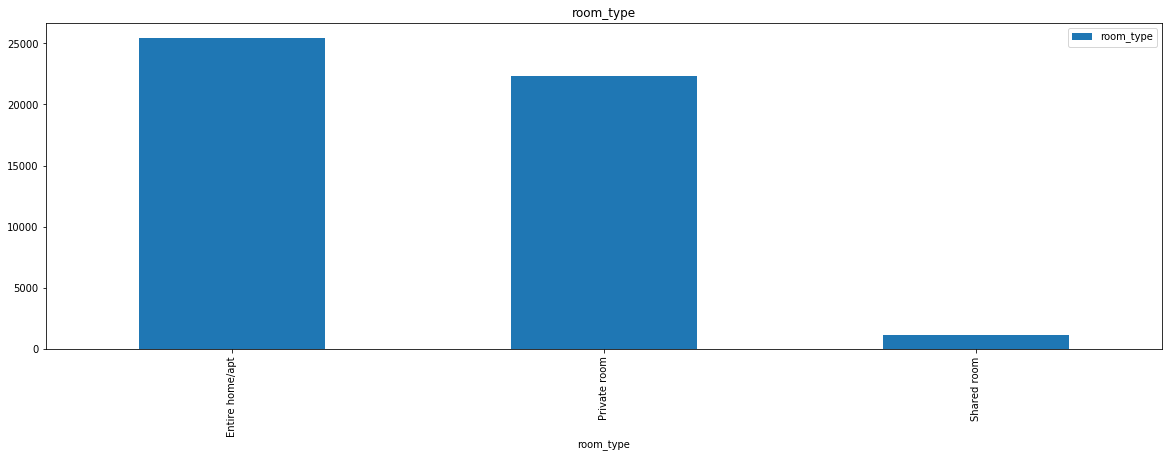


column: price , dtype: int64
count: 48895
nunique: 674
isnull sum: 0
zero count: 11
max: 10000 min: 0
top value counts:
 price  count
   100   2051
   150   2047
    50   1534


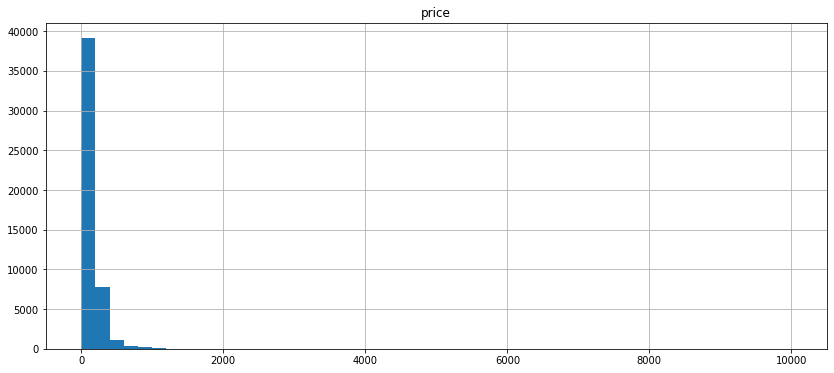


column: minimum_nights , dtype: int64
count: 48895
nunique: 109
isnull sum: 0
zero count: 0
max: 1250 min: 1
top value counts:
 minimum_nights  count
              1  12720
              2  11696
              3   7999


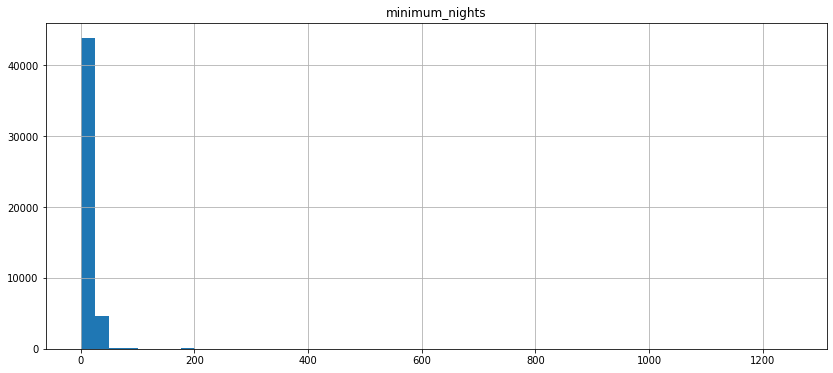


column: number_of_reviews , dtype: int64
count: 48895
nunique: 394
isnull sum: 0
zero count: 10052
max: 629 min: 0
top value counts:
 number_of_reviews  count
                 0  10052
                 1   5244
                 2   3465


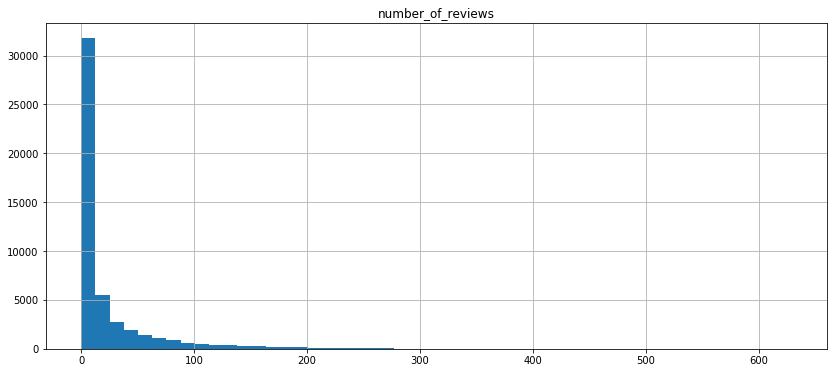


column: last_review , dtype: datetime64[ns]
count: 38843
nunique: 1764
isnull sum: 10052
zero count: 0
max: 2019-07-08 00:00:00 min: 2011-03-28 00:00:00
top value counts:
last_review  count
 2019-06-23   1413
 2019-07-01   1359
 2019-06-30   1341


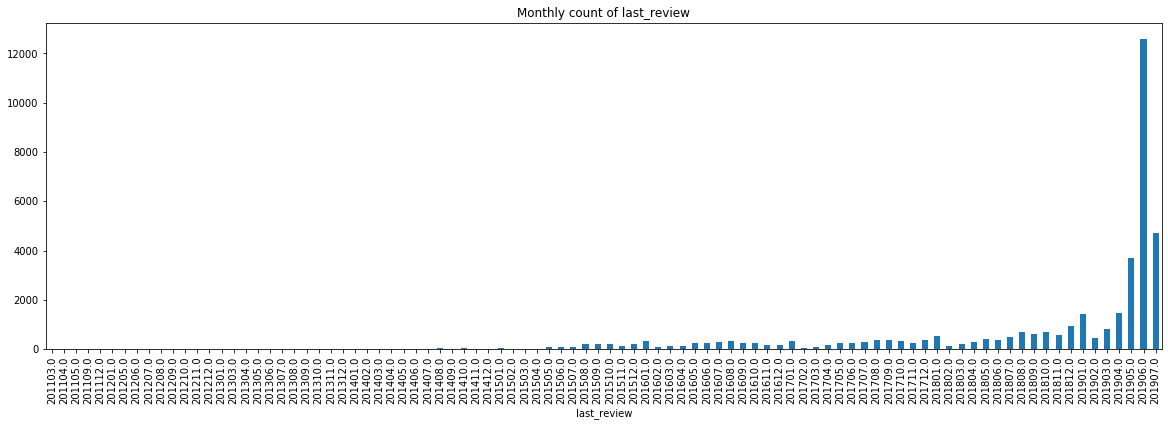


column: reviews_per_month , dtype: float64
count: 38843
nunique: 937
isnull sum: 10052
zero count: 0
max: 58.5 min: 0.01
top value counts:
 reviews_per_month  count
              0.02    919
              0.05    893
              1.00    893


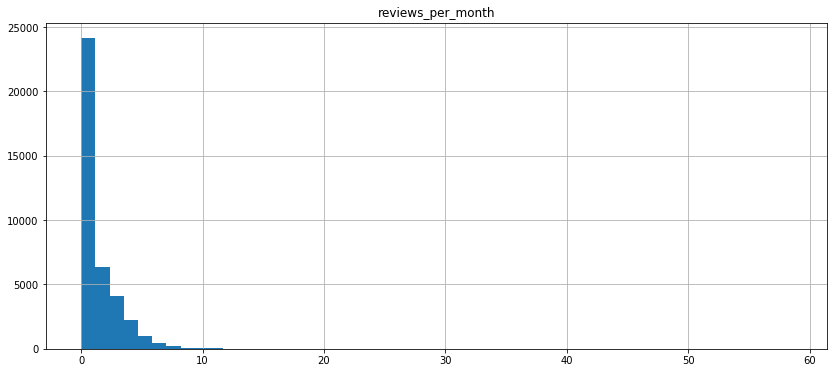


column: calculated_host_listings_count , dtype: int64
count: 48895
nunique: 47
isnull sum: 0
zero count: 0
max: 327 min: 1
top value counts:
 calculated_host_listings_count  count
                              1  32303
                              2   6658
                              3   2853


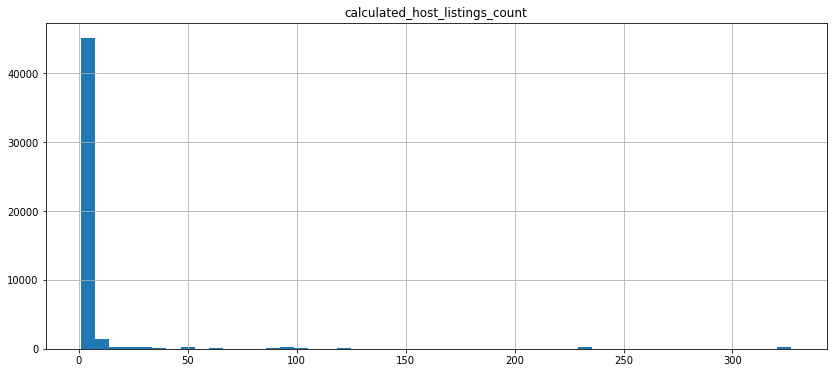


column: availability_365 , dtype: int64
count: 48895
nunique: 366
isnull sum: 0
zero count: 17533
max: 365 min: 0
top value counts:
 availability_365  count
                0  17533
              365   1295
              364    491


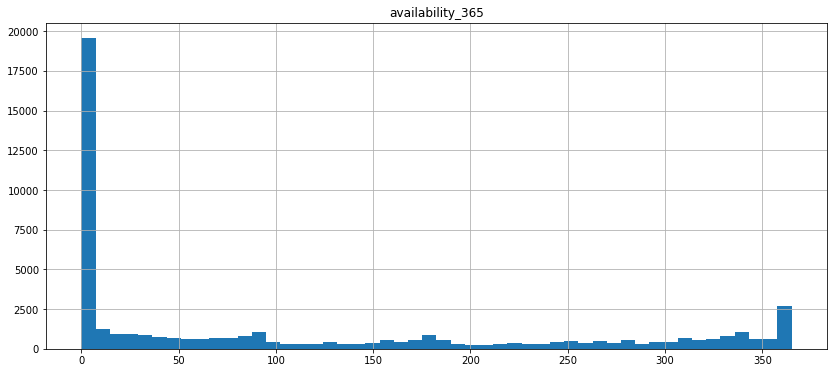

In [7]:
eda.eda_basic(data)

## EDA Correlations/Subgroup-populations - all to Columns


column: id , dtype: int64
compared_col: price
corr_pearson:  0.010618661200445018
Too many (or just one) unique values for box-plot

column: name , dtype: object
compared_col: price
nunique: 47905

column: host_id , dtype: int64
compared_col: price
corr_pearson:  0.015309076152975271
Too many (or just one) unique values for box-plot

column: host_name , dtype: object
compared_col: price
nunique: 11452

column: neighbourhood_group , dtype: object
compared_col: price
nunique: 5


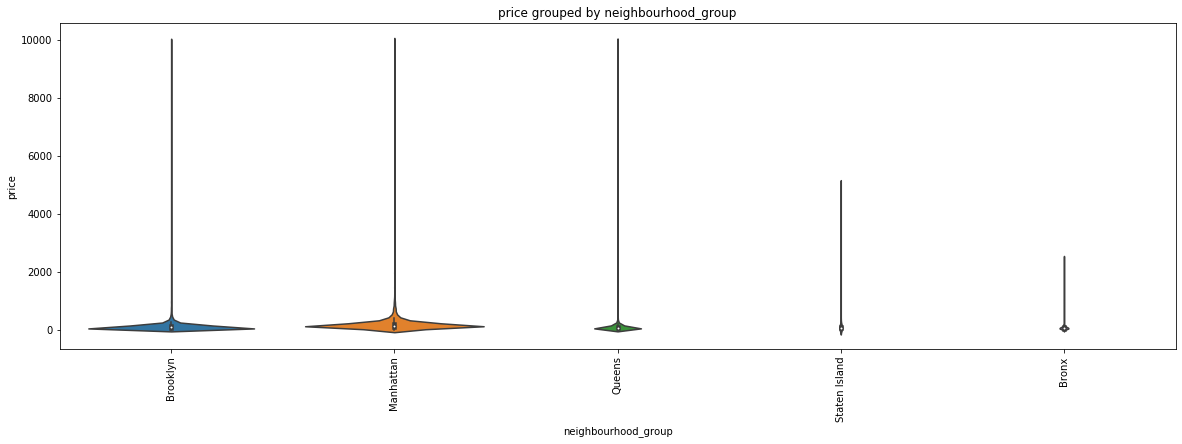


column: neighbourhood , dtype: object
compared_col: price
nunique: 221

column: latitude , dtype: float64
compared_col: price
corr_pearson:  0.033938668232625695
Too many (or just one) unique values for box-plot

column: longitude , dtype: float64
compared_col: price
corr_pearson:  -0.15001926996895357
Too many (or just one) unique values for box-plot

column: room_type , dtype: object
compared_col: price
nunique: 3


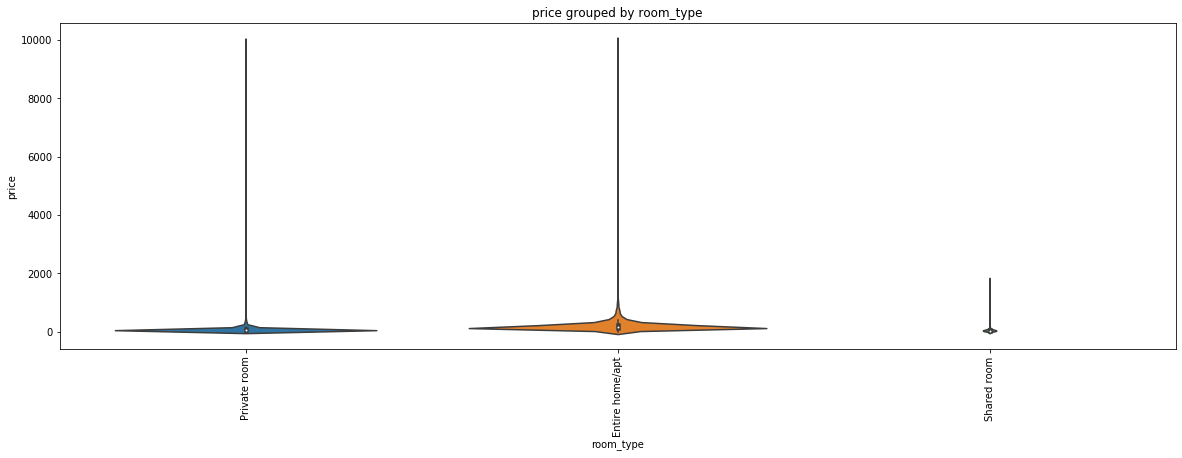


column: price , dtype: int64
compared_col: price
Too many (or just one) unique values for box-plot

column: minimum_nights , dtype: int64
compared_col: price
corr_pearson:  0.04279933414330347
Too many (or just one) unique values for box-plot

column: number_of_reviews , dtype: int64
compared_col: price
corr_pearson:  -0.04795422658266219
Too many (or just one) unique values for box-plot

column: last_review , dtype: datetime64[ns]
compared_col: price



corr_pearson:  -0.016664620647917613


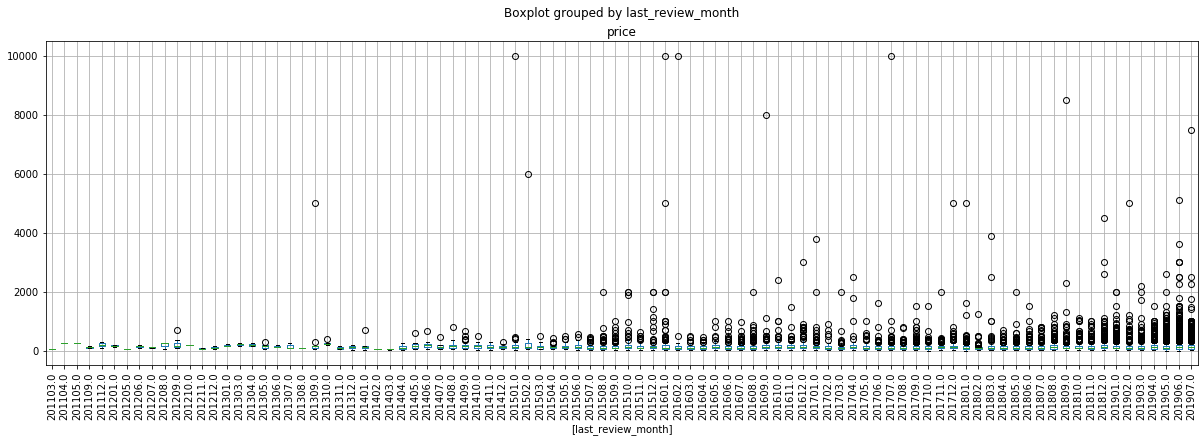

Too many (or just one) unique values for box-plot

column: reviews_per_month , dtype: float64
compared_col: price
corr_pearson:  -0.03060834856753313
Too many (or just one) unique values for box-plot

column: calculated_host_listings_count , dtype: int64
compared_col: price
corr_pearson:  0.057471688368067944
Too many (or just one) unique values for box-plot

column: availability_365 , dtype: int64
compared_col: price
corr_pearson:  0.08182882742168794
Too many (or just one) unique values for box-plot


In [8]:
compared_col_list = ["price"]
eda.eda_correlation_all_to_column(data, compared_col_list, 0.3)

# Histograms before and after outlier removal

Limit_edges:  [-90. 334.]


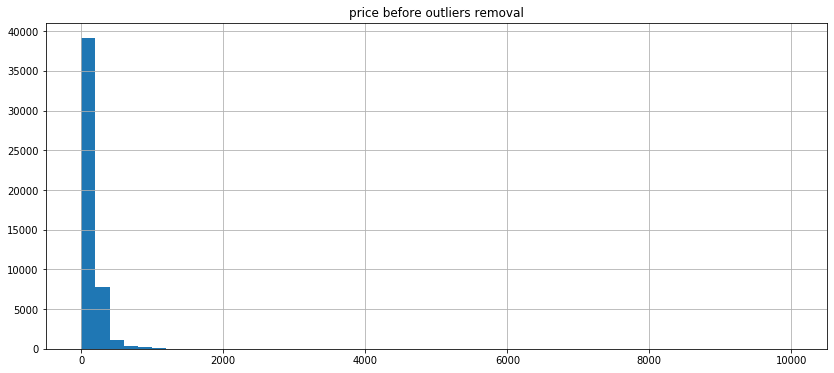

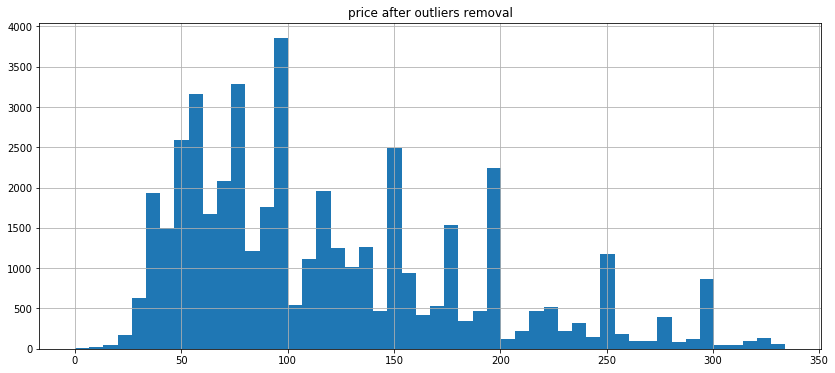

In [9]:
eda.get_hist_before_after_outlier_removal(data, "price")

## EDA for Text Columns
- number of words for a chosen column
- number of words of a chosen column compared to all relevant columns
- Wordcloud
- Token frequency
- Bigram frequency
- Simple topic modeling for a column

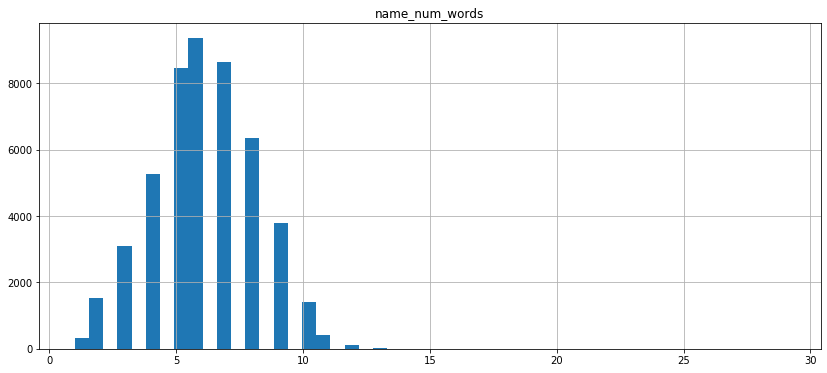


column: id , dtype: int64
compared_col: name_num_words
corr_pearson:  0.18544449402336807
Too many (or just one) unique values for box-plot

column: name , dtype: object
compared_col: name_num_words
nunique: 47905

column: host_id , dtype: int64
compared_col: name_num_words
corr_pearson:  0.09637914929752284
Too many (or just one) unique values for box-plot

column: host_name , dtype: object
compared_col: name_num_words
nunique: 11452

column: neighbourhood_group , dtype: object
compared_col: name_num_words
nunique: 5


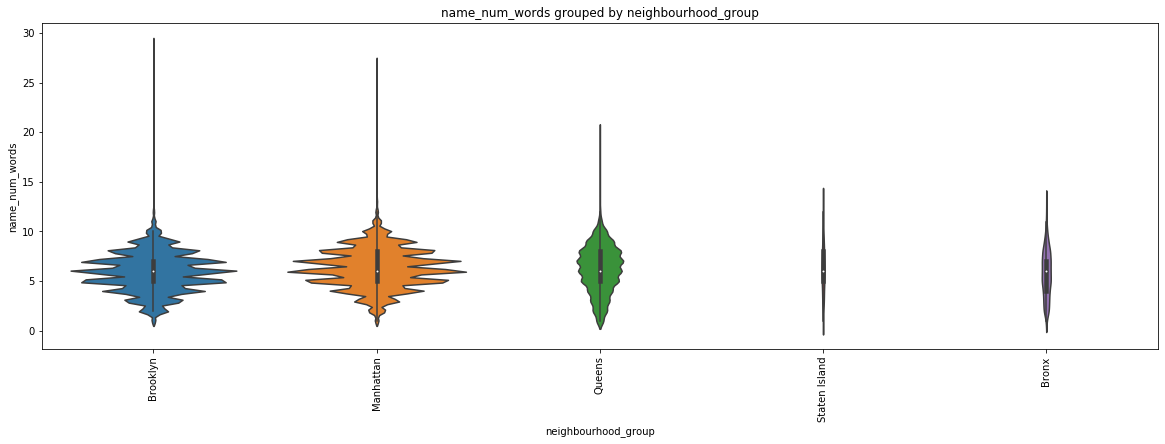


column: neighbourhood , dtype: object
compared_col: name_num_words
nunique: 221

column: latitude , dtype: float64
compared_col: name_num_words
corr_pearson:  0.02815410226152335
Too many (or just one) unique values for box-plot

column: longitude , dtype: float64
compared_col: name_num_words
corr_pearson:  -0.05227163703214027
Too many (or just one) unique values for box-plot

column: room_type , dtype: object
compared_col: name_num_words
nunique: 3


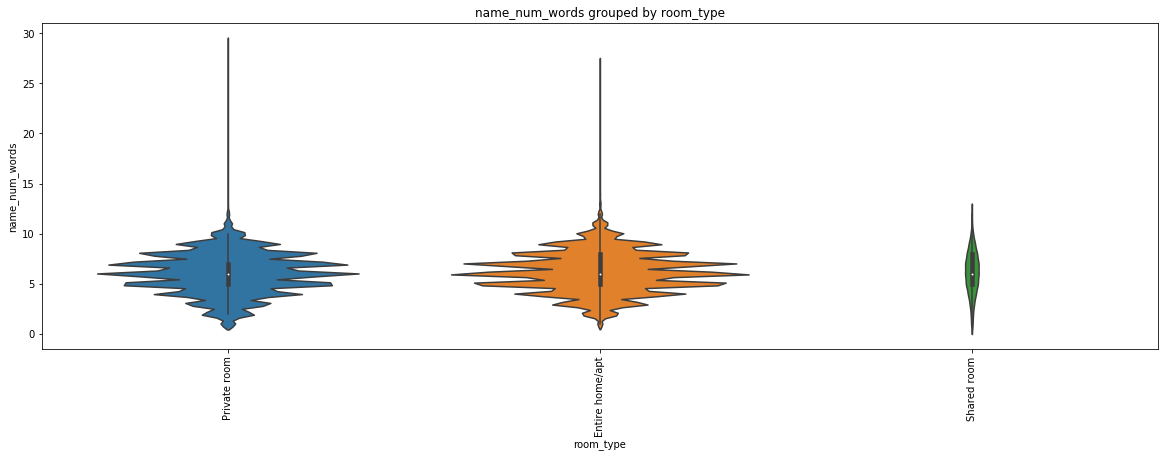


column: price , dtype: int64
compared_col: name_num_words
corr_pearson:  0.03320405361175281
Too many (or just one) unique values for box-plot

column: minimum_nights , dtype: int64
compared_col: name_num_words
corr_pearson:  0.03156702115275454
Too many (or just one) unique values for box-plot

column: number_of_reviews , dtype: int64
compared_col: name_num_words
corr_pearson:  -0.015593547988305728
Too many (or just one) unique values for box-plot

column: last_review , dtype: datetime64[ns]
compared_col: name_num_words



corr_pearson:  0.12647734469087596


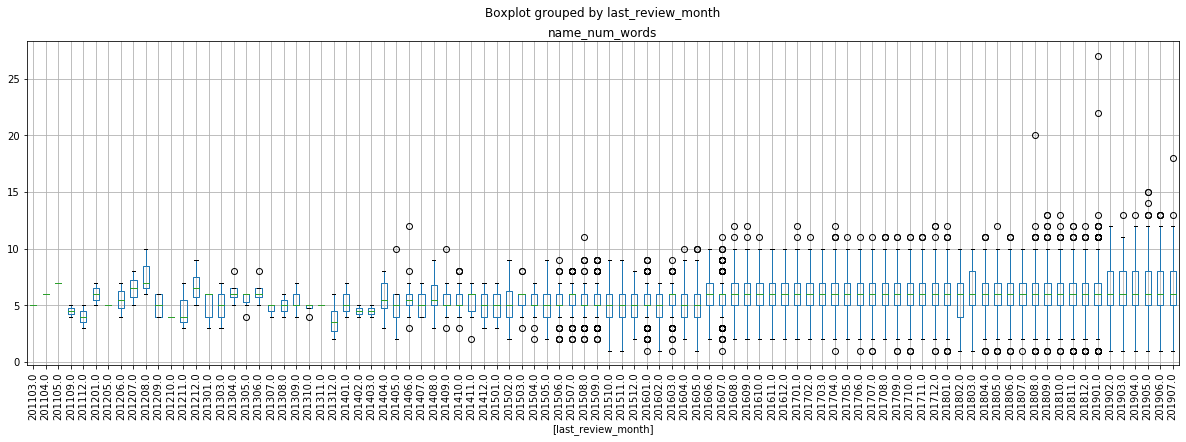

Too many (or just one) unique values for box-plot

column: reviews_per_month , dtype: float64
compared_col: name_num_words
corr_pearson:  0.0964478700071904
Too many (or just one) unique values for box-plot

column: calculated_host_listings_count , dtype: int64
compared_col: name_num_words
corr_pearson:  0.20317551940674278
Too many (or just one) unique values for box-plot

column: availability_365 , dtype: int64
compared_col: name_num_words
corr_pearson:  0.059978597827609836
Too many (or just one) unique values for box-plot

column: name_num_words , dtype: float64
compared_col: name_num_words
Too many (or just one) unique values for box-plot


In [13]:
col = "name"
num_words_col = col+"_num_words"
eda.explore_num_words_for_col(data, col)
eda.eda_correlation_all_to_column(data, num_words_col)

# Wordcloud

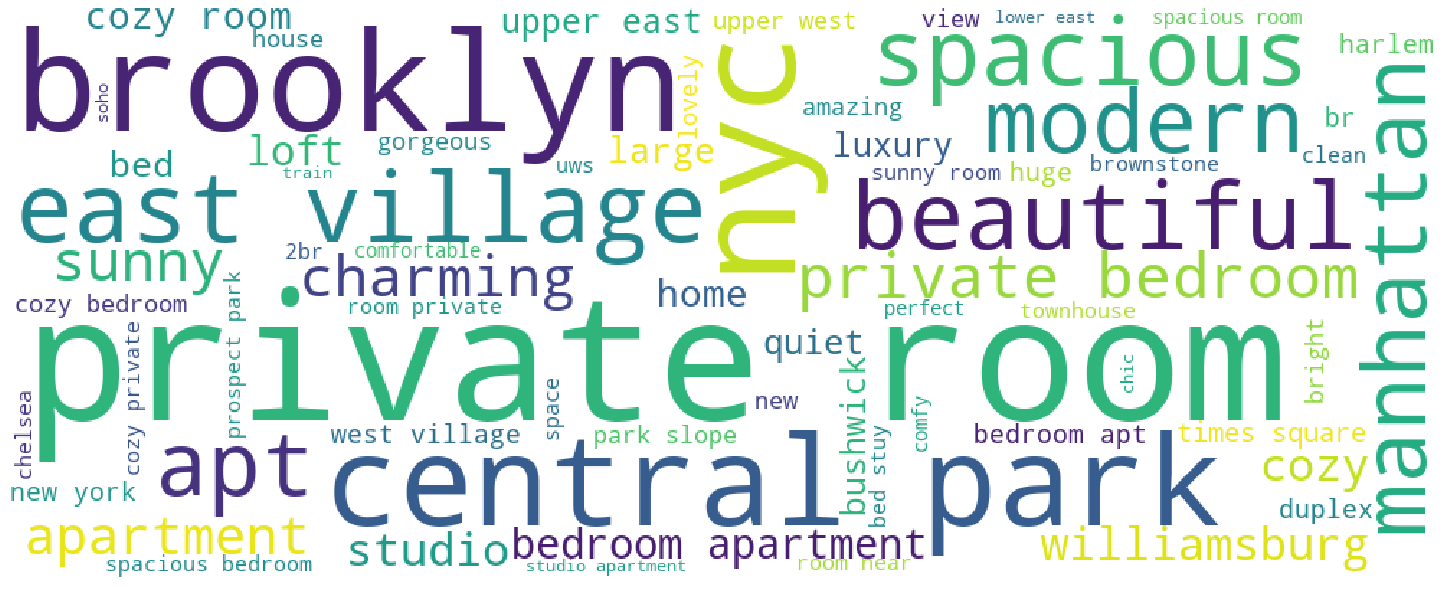

In [14]:
eda.generate_wordcloud_for_col(data, "name")    

# Top Tokens frequency - Unigrams and Bigrams

In [15]:
eda.get_top_word_frequency_col(data, "name")   
eda.get_top_bigrams_frequency_col(data, "name")

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Top Word frequencies:


,count
room,10281
bedroom,8205
private,7409
apartment,6760
cozy,5097
apt,4740
brooklyn,4175
studio,4106
spacious,3796
manhattan,3592


/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Top Bigrams frequencies:


,count
private room,2893
central park,1355
east village,1321
private bedroom,1059
bedroom apartment,902
cozy room,872
upper east,694
times square,670
west village,641
new york,622


# Simple Topic Modeling for Columns

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: apartment bedroom east village studio
Topic #1: brooklyn room loft bedroom private
Topic #2: home new manhattan upper close
Topic #3: park central apartment bedroom square
Topic #4: room private manhattan cozy bedroom



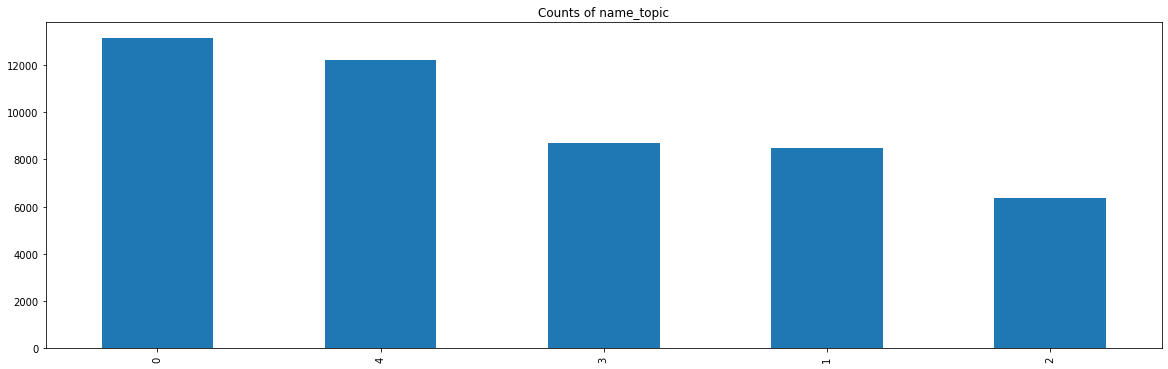

In [16]:
col = "name"
num_topic = 5
top_words_for_topic = 5
eda.simple_topic_modeling_for_col(data, col, num_topic, top_words_for_topic)